In [80]:
import numpy as np
from ase.io.trajectory import Trajectory
from ase.visualize import view
from glob import glob
sys.path.append('/media/rbnfiles/ruco/repos/atomistic-analysis/src')
from opendata import data
from pymatgen.io.ase import AseAtomsAdaptor
import pandas as pd

# files = !ls ../../../../dft/pts2/2x2supercellPtS2/strain/Aniso/magnetic/*.traj
files = !ls ../../../../dft/pts2/2x2supercellPtS2/strain/Aniso/magnetic/*.traj
files = sorted(files)
files[0:11]= files[0:11][::-1]

df = pd.DataFrame([i.split('/')[-1].split('.traj')[0] for i in files],columns=['File'])

no = 4
display(df)
atoms = Trajectory(files[no])
# allatoms=[Trajectory(files[i]) for i in range(0,1) if i!= 3]
allatoms=[Trajectory(files[i]) for i in range(len(files))]

# alllabels=[df.iloc[i][0] for i in range(0,9)if i!=3]
alllabels=[df.iloc[i][0] for i in range(len(files))]

#df.sort_values(by=['File'],ascending=False)

,File
0,PtS2_vacPt_magnetic_-0.07
1,PtS2_vacPt_magnetic_-0.06
2,PtS2_vacPt_magnetic_-0.05
3,PtS2_vacPt_magnetic_-0.04
4,PtS2_vacPt_magnetic_-0.03
5,PtS2_vacPt_magnetic_-0.02
6,PtS2_vacPt_magnetic_-0.01
7,PtS2_vacPt_magnetic_-0.008
8,PtS2_vacPt_magnetic_-0.006
9,PtS2_vacPt_magnetic_-0.004


In [92]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from ase.visualize.plot import plot_atoms
from IPython.display import display, clear_output,HTML
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["font.family"] = "serif"

ncols = 3
nrows=(len(allatoms)/ncols) if isinstance(len(allatoms)/ncols, int)==False else int((len(allatoms)/ncols)+1)
nrows=6

fig, ax = plt.subplots(nrows,ncols,figsize=(10,7),frameon=True,facecolor='black')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
def alltrajs(frame):
    count=0
    for i in range(nrows):
        for j in range(ncols):
            ax[i,j].clear()
            ax[i,j].set_axis_off()
            if count < len(allatoms):
                ax[i,j].set_title(alllabels[count])
                plot_atoms(allatoms[count][frame],ax[i,j],radii=0.5)
                count+=1
            # else:
            #     fig.delaxes(ax[i,j])
            #     break
    return fig

def animate(frame):
    clear_output(wait=True)
    print("Run Frame No. :",frame)
    return alltrajs(frame)

plt.tight_layout()
plt.show()

#animate(31)
anim = animation.FuncAnimation(fig,animate,frames=np.arange(0,1))
anim

Run Frame No. : 0


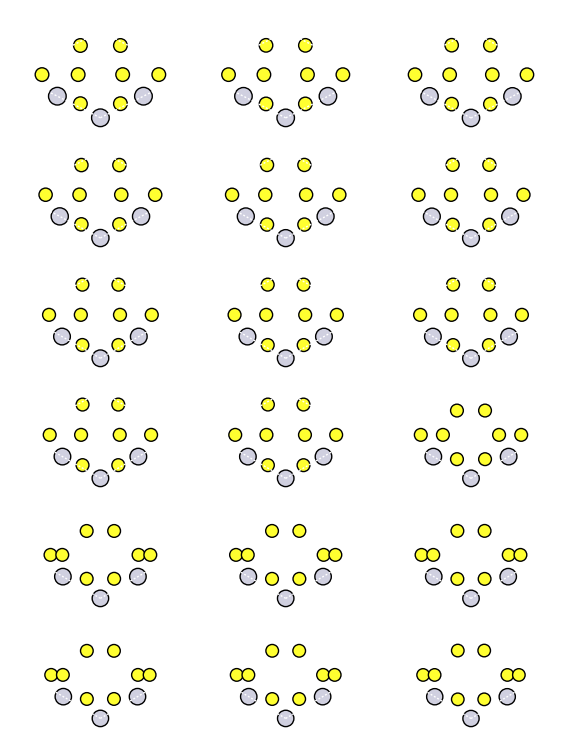

In [143]:
ncols = 3
nrows = (len(allatoms)/ncols) if isinstance(len(allatoms)/ncols, int)==False else int((len(allatoms)/ncols)+1)
nrows = 6

fig, ax = plt.subplots(nrows,ncols,figsize=(9,7),frameon=False,facecolor='black')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = -0.65)
count=0
for i in range(nrows):
    for j in range(ncols):
        #ax[i,j].clear()
        ax[i,j].set_axis_off()
        if count <=len(allatoms):
            ax[i,j].set_title(r"D=%s %%"%(alllabels[count].split('_')[-1]), fontsize=10)
            plot_atoms(allatoms[count][-1],ax[i,j],radii=0.5)
            count+=1
        else:
            fig.delaxes(ax[i,j])
            break
# plt.tight_layout()
plt.show()

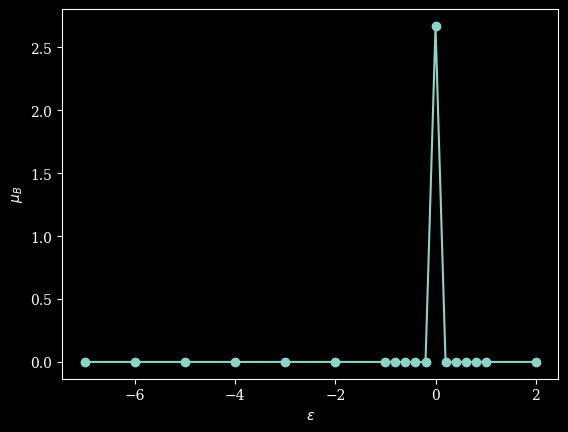

In [145]:
anatoms = []
for i,j in zip(allatoms,alllabels):
    anatoms.append([i[-1].get_magnetic_moment(),float(j.split('_')[-1])])
anatoms = np.array(anatoms)

plt.plot(anatoms[:,1]*100,anatoms[:,0],'-o')
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\mu_{B}$")
plt.show()